# Elektrische Energie messen

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Messgenauigkeit, Messfehler und Sicherheitsaspekte bei elektrischer Energiemessung beachten </li>
        <li> mit Kennwerten von Messgeräten und Plausibilisierung </li>
        <li> um korrekte Schlussfolgerungen aus Messungen zu ziehen und sicher zu messen</li>
    </ul>
</div>

## Messgenauigkeit

### Zeitdiskrete Signale (Digitalsignale)

Auch, wenn Messsignale physikalisch keine "Pause" machen, sehen digitale Signale immer so aus, als ob zwischen jedem Messwert eine Pause wäre. Ein Messgerät misst punktuell zum Messzeitpunkt und mittelt über einen Zeitraum darum herum.

<AxesSubplot:xlabel='t'>

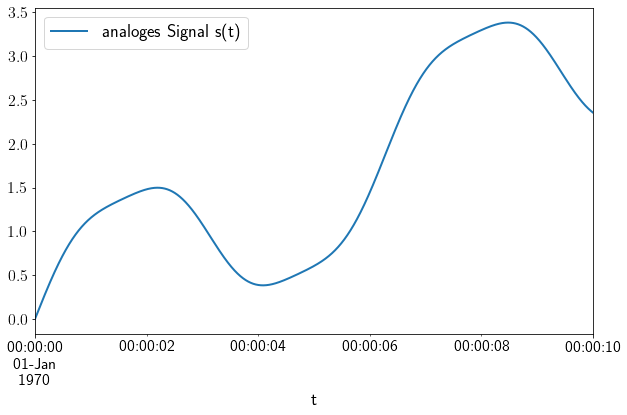

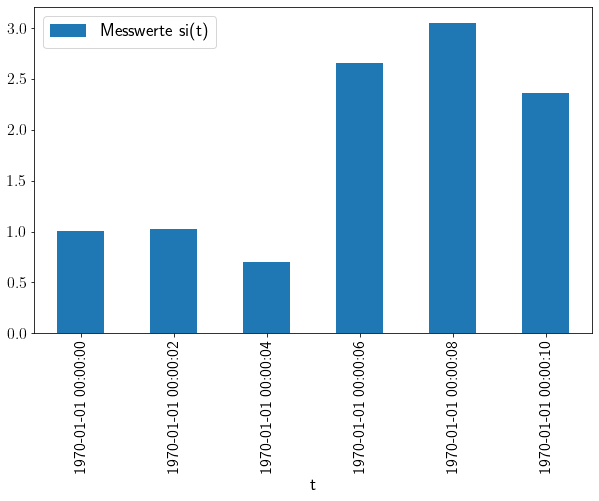

In [3]:
t = 1e6*np.linspace(0,10000,10001)
td = pd.to_datetime(t, unit = 'ns')
df = pd.DataFrame(data = td, columns = ['t'])
df = df.set_index('t')
df['analoges Signal s(t)'] = np.sin(1e-9*t)+0.1*np.sin(3*1e-9*t)+0.3*1e-9*t
df.plot()
dfm = df.resample('2S').mean()
dfm = dfm.rename(columns={"analoges Signal s(t)": "Messwerte si(t)"})
dfm.plot.bar()

Die obige Darstellung zeigt, dass man oft genug messen muss, um ein Signal später realistisch darzustellen. Würde man die Messwertbalken verbinden, würde jedenfalls das Signal anders aussehen als das ursprüngliche Signal.

Das **Abtasttheorem von Shannon** besagt, dass ein Signal mindestens mit der doppelten höchsten vorkommenden Frequenz abgetastet werden muss, damit es reproduziert werden kann.

<AxesSubplot:xlabel='t'>

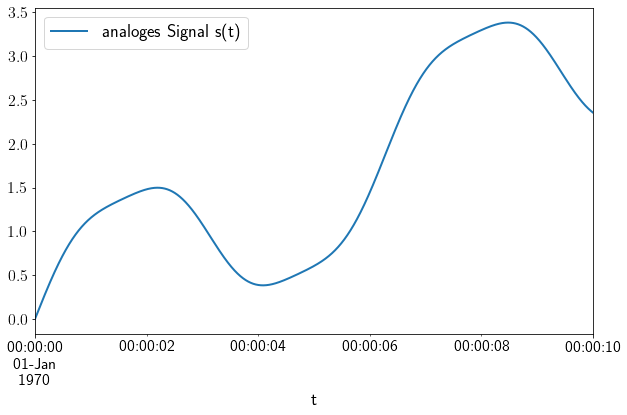

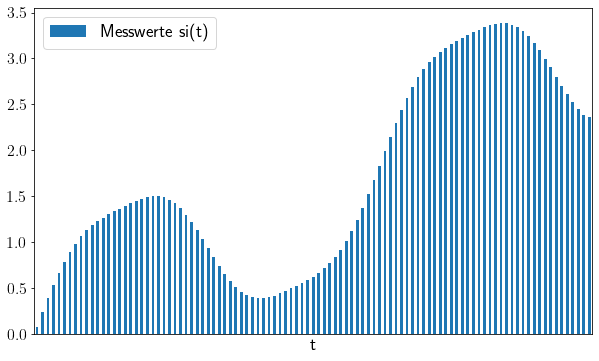

In [4]:
t = 1e6*np.linspace(0,10000,10001)
td = pd.to_datetime(t, unit = 'ns')
df = pd.DataFrame(data = td, columns = ['t'])
df = df.set_index('t')
df['analoges Signal s(t)'] = np.sin(1e-9*t)+0.1*np.sin(3*1e-9*t)+0.3*1e-9*t
df.plot()
dfm = df.resample('100L').mean()
dfm = dfm.rename(columns={"analoges Signal s(t)": "Messwerte si(t)"})
dfm.plot.bar(xticks =[])

Für das Beispielsignal sind offenbar sekündliche Messwerte nicht mehr ausreichend, um es zu reproduzieren. Bei einer Zehntelsekunde kann man dann jedoch ganz gut erkennen.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welchen Effekt hat dies auf die Messgenauigkeit bei Lastprofilen? Was kann man tun, damit auch Messwerte in Viertelstundenauflösung oder gar Stundenauflösung noch sinnvolle Hinweise auf Energiesparpotenziale geben?
</div>

*Antwort:...*

Die elektrische Leistung lässt sich mit einem elektrodynamischen Messwerk oder mit einem **digitalen Leistungsmesser** messen: Strom und Spannung werden separat gemessen und digitalisiert. Die Analog-Digital-Umwandlung erfolgt bei Verbrauchern an 50 Hz typischerweise mit Abtastraten von 50 kHz, d.h. das analoge Signal wird alle 20 μs digitalisiert. Der Signalprozessor berechnet daraus die Effektivwerte von Strom und Spannung und bestimmt den Phasenwinkel. Ebenso kann er bereits Wirk-, Blind- und Scheinleistung sowie den Leistungsfaktor berechnen.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Was passiert, wenn ein Signal weniger häufig als 50 kHz gemessen wird? Welche Effekte auf die Messgenauigkeit ergeben sich dadurch? Für welche Art von Verbrauchern könnte dies besonders relevant sein?
</div>

*Antwort:...*

### Wertdiskrete Signale

Je nach Auflösung der eingesetzten Messwandler ergibt sich eine Messwertauflösung.

<AxesSubplot:xlabel='t'>

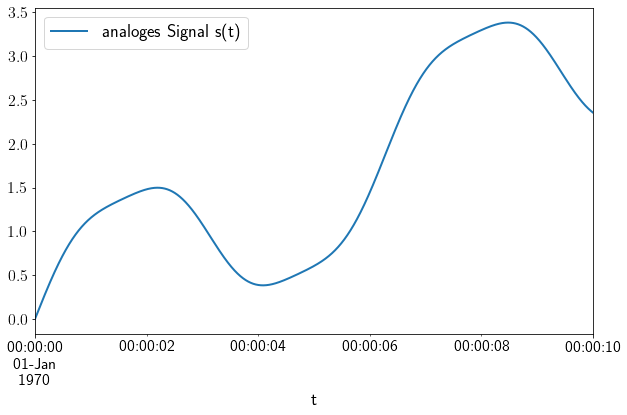

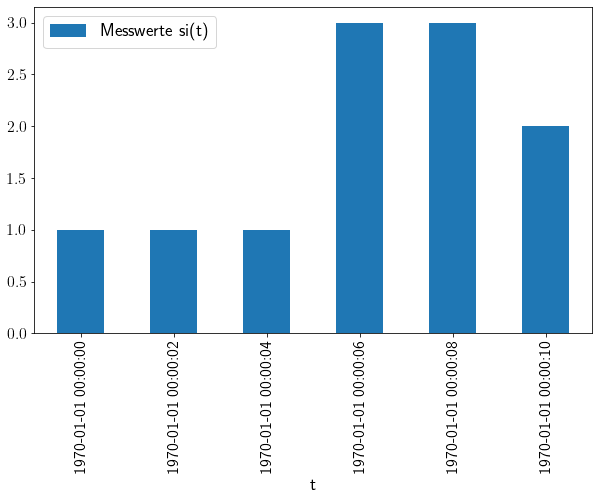

In [5]:
t = 1e6*np.linspace(0,10000,10001)
td = pd.to_datetime(t, unit = 'ns')
df = pd.DataFrame(data = td, columns = ['t'])
df = df.set_index('t')
df['analoges Signal s(t)'] = np.sin(1e-9*t)+.1*np.sin(3*1e-9*t)+.3*1e-9*t
df.plot()
dfm = df.resample('2S').mean()
dfm = dfm.round(0)
dfm = dfm.rename(columns={"analoges Signal s(t)": "Messwerte si(t)"})
dfm.plot.bar()

Hier liegt - verglichen mit dem obigen Signal mit 6 Messwerten auch eine Veränderung vor, weil das Signal eine niedrigere Auflösung hat, d.h. es ist z. B. nur möglich zwischen 1 und 2 zu unterscheiden, aber nicht, ob nun 1,7 oder 1,8 anliegen.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welchen Effekt hat dies auf die Messgenauigkeit bei Lastprofilen? Was kann man tun, damit auch Messwerte in Viertelstundenauflösung oder gar Stundenauflösung noch sinnvolle Hinweise auf Energiesparpotenziale geben?
</div>

*Antwort:...*

### Messabweichungen bei elektrischen Energiemessungen

Man unterscheidet - wie bei anderen Messungen auch - systematische und zufällige Messabweichungen. **Systematische** Messabweichungen sind durch den Messaufbau verursacht und können kalibriert werden. Z. B. kann ein Messgerät ohne separate Stromversorgung seinen Leistungsbedarf nur in der Messstrecke decken. Ein weiteres Beispiel ist die ungünstige Auswahl des Messbereichs. Ist dies in der Anzeige nicht berücksichtigt, so misst das Messgerät einen um den Eigenbedarf erhöhten Leistungsbedarf. **Zufällige** oder auch **statistische** Messabweichungen sind nicht vermeidbar. Z. B. entstehen solche statistischen Messabweichungen, wenn man versucht, die letzte Nachkommastelle einer Anzeige zu berücksichtigen.

![Messkette](../img/messkette.png)

Die Abbildung beinhaltet die Funktionsweise eines digitalen Leistungsmessers: separate Strom- und Spannungsmessung, galvanische Trennung (Transformator), Verstärker, Analog-Digital-Umsetzung (A/D) und (zumeist gemeinsamer) Prozessor, ggf. mit Anzeige.

Zur Beurteilung der möglichen Messgenauigkeit ist die gesamte Messkette zu  betrachten: Jeder Messschritt aus dem obigen Schema sowie die Verbindungstechnik dazwischen kann mit Unsicherheiten behaftet sein. Für das Messgerät an sich finden sich Angaben zur Messgenauigkeit im Datenblatt. Zudem können Daten aus bereits erfolgten Kalibrationen herangezogen werden. Zur Interpretation der Messgenauigkeit siehe auch den separaten Abschnitt weiter unten.

Ein weiterer Aspekt ist, ob die Spannung überhaupt separat gemessen wird. Es gibt Leistungsmessgeräte, die man auf Leitungen aufklipsen kann (siehe das Beispiel im Bild).

![Clampmeter Fluke 337](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Clampmeter_Fluke_337.jpg/256px-Clampmeter_Fluke_337.jpg) *Harke / Public domain, https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Clampmeter_Fluke_337.jpg/256px-Clampmeter_Fluke_337.jpg*

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Warum ist es relevant, ob die Spannung überhaupt gemessen wird? Welchen Fehler macht man dadurch bei der Leistungsmessung?
</div>

*Antwort:...*

Ebenso ist die Art der Strommessung mit Unsicherheiten behaftet: Bei den Stromsensoren existieren drei Messmethoden: 
- Die Messung der Spannung über einen Parallelwiderstand (sog. Shunt) ist am genauesten, wenn es sich um einen sehr genau kalibrierten Shunt handelt. Nachteilig ist, dass ein Eingriff in den Stromkreis notwendig ist, um den Shunt einzubauen. Daher nutzen die meisten Energiemanagement-Messysteme eine der beiden anderen Messmethoden, die berührungslos mit Stromzangen oder Leiterschleifen arbeiten können.
- Die sog. Rogowski-Spule oder Übertrager-Stromzange besteht aus einer ringförmigen Spule, die eine Aussparung besitzt, um das Kabel einzuführen. Wechselstrom induziert über das wechselnde Magnetfeld eine Spannung in dieser Spule, die wiederum gemessen werden kann.
- Alternativ lässt sich eine Hall-Sonde verwenden, die auch Gleichströme messen kann.

Leistungsmessgeräte, die in der Lage sind, auch nichtsinusförmige Ströme zu messen, heißen Leistungsanalysatoren. Sie haben eine aufwendigere Messelektronik, um Abtastraten bis 100 kHz zu ermöglichen.

**Dynamische Fehler**: Das dynamische Verhalten eines Messsystems beschreibt die Abhängigkeit des Messwerts $x_m$ vom wahren Wert der Messgröße $x_w$ bis zum Erreichen des stationären Zustands des Systems. Wie lange dauert es, bis das Messergebnis mit vertretbarem Fehler ablesbar wird? Wie schnell darf sich die Messgröße verändern, um bei vertretbarem Fehler den Verlauf noch verfolgen zu können? Als Beispiel sei genannt, dass der Leistungsanalysator HMC8015, der im Labor zum Einsatz kommt laut Herstellerangaben eine Stunde benötigt, bis er diejenige Betriebstemperatur erreicht hat, bei der die angegebenen Genauigkeitswerte gelten.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie ist das bei elektrischen Verbrauchern? Wie unterscheidet sich der Verbrauch beim Einschalten und im Dauerbetrieb? Was bedeutet das für die Messungen für Ihre Projekte? Sind das Messfehler oder wollen wir dieses Verhalten auch messen?
</div>

*Antwort:...*

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welchen Effekt hat dies auf die Messgenauigkeit bei Lastprofilen? Was kann man tun, damit auch Messwerte in Viertelstundenauflösung oder gar Stundenauflösung noch sinnvolle Hinweise auf Energiesparpotenziale geben?
</div>

*Antwort:...*

### Angabe der Genauigkeit

Messgerätehersteller geben die Genauigkeit häufig bezogen auf den Messbereichsendwert unter bestimmten Randbedingungen (z. B. Temperatur, Feuchte) an.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie die Messgenauigkeit der Wirkleistungsmessung für den Energielogger, wenn er eine Leistung von 5 W und wenn er eine Leistung von 5000 W messen soll. In welchem Bereich liegt die tatsächliche Leistung?
</div>

*Antwort:...*

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Weiterführende Literatur:</b></div>
    
- Bernd Aschendorf. “Grundlagen zur elektromechanischen Messung”. de. In: *Energiemanagement durch Gebäudeautomation*. Wiesbaden: Springer Fachmedien Wiesbaden, 2014, pp. 823–860. isbn: 978-3-8348-0573-7 978-3-8348-2032-7. doi: 10.1007/978-3-8348-2032-7_10. url: http://link.springer.com/10.1007/978-3-8348-2032-7_10 {cite:p}``aschendorf_grundlagen_2014`` (mit cisco VPN auf springerlink im Netz der TH verfügbar)
    
- Jens Hesselbach. “Daten beschaffen”. de. In: *Energie- und klimaeffiziente Produktion*. Wiesbaden: Vieweg+Teubner Verlag, 2012, pp. 55–93. isbn: 978-3-8348-0448-8 978-3-8348-9956-9. doi: 10.1007/978-3-8348-9956-9_3. url: http://www.springerlink.com/index/10.1007/978-3-8348-9956-9_3 {cite:p}``hesselbach_energie-_2012`` (mit cisco VPN digital über die Bibliothek im Netz der TH verfügbar, anders als die obigen zwei)
</div>

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Weiterführende Literatur:</b></div>
Thomas Mühl. Elektrische Messtechnik: Grundlagen, Messverfahren,  Anwendungen. de. 5., überarbeitete und erweiterte Auflage. Lehrbuch. OCLC: 964673854. Wiesbaden: Springer Vieweg, 2017. isbn: 978-3-658-15719-7
978-3-658-15720-3. (mit cisco VPN auf springerlink im Netz der TH verfügbar) {cite:p}``muhl_elektrische_2017``
</div>

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Weiterführende Literatur:</b></div>
Reinhard Lerch. Elektrische Messtechnik: Analoge, digitale und computergestützte Verfahren. 7., aktualisierte Auflage. Berlin und Heidelberg: Springer Vieweg, 2016. isbn: 978-3-662-46941-5. doi: 10.1007/978-3-662-46941-5 {cite:p}``lerch_elektrische_2016`` (mit cisco VPN auf springerlink im Netz der TH verfügbar)
</div>

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Weiterführende Literatur:</b></div>

- Jörg Hoffmann (Hrsg.). Taschenbuch der Messtechnik: Mit 62 Tabellen. 4., akt. u. erg. Aufl., München: Fachbuchverl. Leipzig im Carl Hanser Verl., 2004. isbn: 9783446228603 {cite:p}``hoffmann_taschenbuch_2015``
</div>

## Eigenständige Messgeräte für unterschiedliche Einsätze

Für die Messung elektrischer Leistung gibt es sehr viele unterschiedliche, häufig auf den jeweiligen Einsatzort angepasste, Messgeräte. Viele sind integriert in eine Maschine, deren Energiebedarf ermittelt werden soll. Hier soll es um eine Auswahl von Messgeräten gehen, die sich unabhängig und häufig auch mobil einsetzen lassen.

### USB-Geräte vermessen

USB powermeter können an einen USB-Port angeschlossen werden und so messen, welche Ströme und Spannungen anliegen und welche Leistungen sich daraus ergeben. Vorsicht: USB-Geräte halten sich oft nicht an die Normen, und Ihr USB-Port am PC kann Schaden nehmen, wenn das Gerät mehr Strom verbraucht, als der Port liefern kann! {cite:p}`boris_hofferbert_usb-power_2020`

![Beispiel USB Powermeter](../img/usb-powermeter.jpg)

### Einphasige Elektrogeräte mit einem Leistungsanalysator vermessen

Das Messgerät, dass auch im Praktikumsversuch "Elektrische Energie messen" eingesetzt wird, ist ein Leistungsanalysator HMC8015 von Rohde und Schwarz.

Wir sehen uns jetzt eine Beispielmessung an:

In [6]:
df=pd.read_csv('../data/IN130306.csv',header=9,sep=';')
#df.head()

<AxesSubplot:xlabel='Time[s]'>

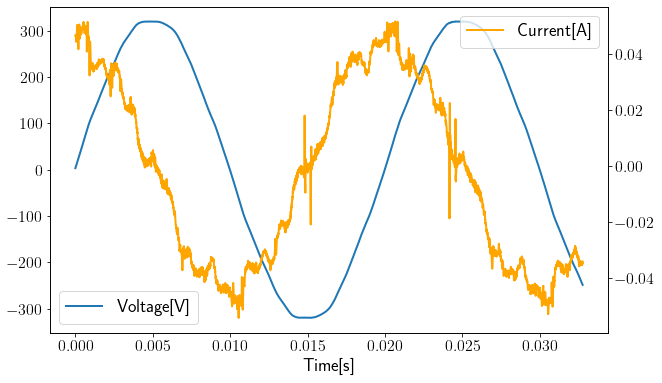

In [7]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
df.plot(x='Time[s]', y='Voltage[V]',ax=ax)
df.plot(x='Time[s]', y='Current[A]',ax=ax2, color='orange')

zeitlicher Abstand zwischen Messpunkten?

In [8]:
resolution=df['Time[s]'][1]-df['Time[s]'][0]
print('zeitlicher Abstand zwischen Messpunkten: '+str(1e6*resolution)+' µs')

zeitlicher Abstand zwischen Messpunkten: 4.0 µs


Messdauer?

In [9]:
duration=np.max(df['Time[s]'])
print('Messdauer '+str(np.round(1e3*duration,2))+' ms')

Messdauer 32.76 ms


Als Index nun die Zeit setzen

In [10]:
df=df.set_index('Time[s]')

Frequenz? sind das wirklich 50 Hz? sieht so aus

eine Periode ist also 
\begin{equation}\label{eq:periode}
T=\frac{1}{f}=\frac{1}{50\text{ Hz}}=20\text{ ms}
\end{equation}

In [11]:
T=1/50
print(str(T)+' s')

0.02 s


Nun berechnen wir die Augenblicksleistung:

<AxesSubplot:xlabel='Time[s]'>

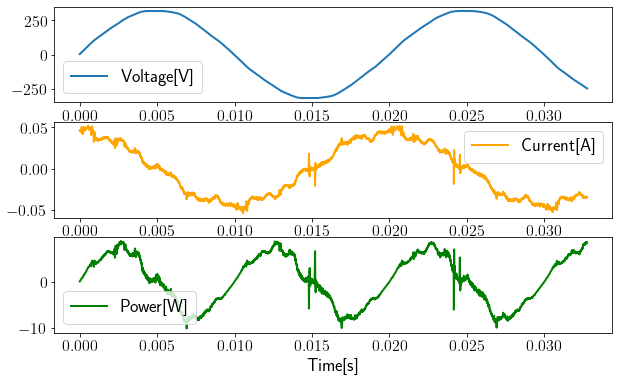

In [12]:
df['Power[W]'] = df['Voltage[V]']*df['Current[A]']
fig, ax = plt.subplots(3,1)
df.plot(y='Voltage[V]',ax=ax[0])
df.plot(y='Current[A]',ax=ax[1], color='orange')
df.plot(y='Power[W]',ax=ax[2], color='green')

Leistung oszilliert sinusförmig und hat Oberwellen (zick-zack-Formen)

was würde ein Energiezähler (der so genau alles mitmacht und nicht zu träge ist) sehen?

<AxesSubplot:xlabel='Time[s]'>

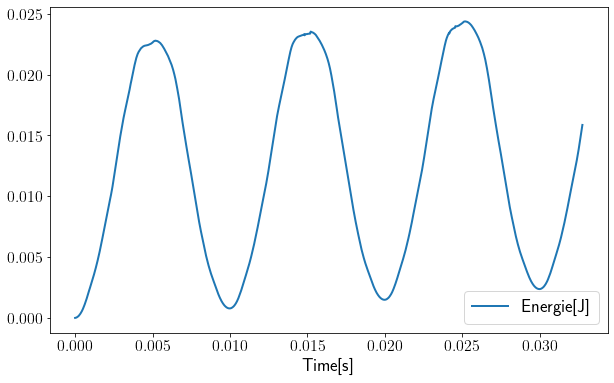

In [13]:
df['Energie[J]'] = resolution*df['Power[W]'].cumsum()
df.plot(y='Energie[J]')

langsam aber sicher scheint die Energie zuzunehmen, d.h. da scheint ein Verbraucher zu sein

Wirkleistung = Mittelwert der Leistung

In [14]:
Pm=df['Power[W]'].mean()
print('Ist ' +str(np.round(1e3*Pm,2))+ ' mW die korrekte Wirkleistung?')

Ist 484.12 mW die korrekte Wirkleistung?


Moment mal, das muss ja immer über einer Periode oder Vielfachen davon gemittelt werden, sonst stimmt es nicht!

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Weiterführend für Ihre Projekte sicher hilfreich:</b></div>
wie man das rollierend, d.h. nicht für einen festen Zeitpunkt macht, sondern z. B. über die jeweils vom aktuellen Datenpunkt aus gesehen letzte Periode, erklärt z. B. der Blogpost {cite:p}``brownlee_moving_2016``
</div>

wir schneiden jetzt aus aus dem Datensatz die Werte von 4 µs bis 20 ms, dann haben wir eine Periode

In [15]:
dfT=df.loc[resolution:T]

Wirkleistung in dieser Periode

In [16]:
P=dfT['Power[W]'].mean()
print('Korrekt ermittelte Wirkleistung ' +str(np.round(1e3*P,2)) +' mW')

Korrekt ermittelte Wirkleistung 74.52 mW


Effektivwert der Spannung nun berechnen:

In [17]:
U = np.sqrt(np.mean(dfT['Voltage[V]']**2))
print('Effektivwert der Spannung ' +str(np.round(U,4))+' V')

Effektivwert der Spannung 229.6239 V


Effektivwert des Stroms nun berechnen:

In [18]:
I=np.sqrt(np.mean(dfT['Current[A]']**2))
print('Effektivwert des Stroms ' +str(np.round(1e3*I,2))+' mA')

Effektivwert des Stroms 31.55 mA


Scheinleistung in VA

In [19]:
S=U*I
print('Scheinleistung ' +str(np.round(S,2))+' VA')

Scheinleistung 7.24 VA


Vergleich mit der Wirkleistung: S >> P!

Grund: bei induktiven / kapazitiven Komponenten fließt der Strom zwischen diesen hin und her, wird im elektrischen bzw. magnetischen Feld zwischengespeichert und wieder entladen, trägt aber nicht zur Wirkleistung bei (die in thermische, mechanische, chemische, Lichtenergie, etc. gewandelt wird)

hier jetzt: Bestimmung der Blindleistung gesamt in der Einheit var

In [20]:
QundD=np.sqrt(S**2-P**2)
print('gesamte Blindleistung = Feldblindleistung Q plus Verzerrungsblindleistung D '+str(np.round(QundD,2))+' var')

gesamte Blindleistung = Feldblindleistung Q plus Verzerrungsblindleistung D 7.24 var


Leistungsfaktor berechnen

In [21]:
cosphi=P/S
print('Leistungsfaktor '+str(np.round(cosphi,2)))

Leistungsfaktor 0.01


wie groß ist der Phasenverschiebungswinkel $\varphi$ nun?

In [22]:
phi=np.arccos(cosphi)
print('Phasenverschiebungswinkel '+str(np.round(phi,2))+' rad')

Phasenverschiebungswinkel 1.56 rad


das ist in rad (Radiant), Grad geht auch

In [23]:
phiG=180*phi/np.pi
print('Phasenverschiebungswinkel '+str(np.round(phiG,2))+'°')

Phasenverschiebungswinkel 89.41°


da der Strom voreilt (sieht man an einem der ersten Diagramme), muss der Winkel negativ sein - es handelt sich um einen kapazitiven Verbraucher

In [24]:
phiG=-180*np.arccos(cosphi)/np.pi
print('Phasenverschiebungswinkel mit korrektem Vorzeichen ' +str(np.round(phiG,2))+'°')

Phasenverschiebungswinkel mit korrektem Vorzeichen -89.41°


Energieverbrauch über der Messzeit: Wirkleistung mal Messzeit (stimmt hier natürlich nicht ganz, denn wir haben nicht überprüft, ob in der nächsten Periode nach der ersten immer noch die gleiche Wirkleistung abgerufen wird, das müsste man dann für jede Periode machen, denn natürlich ändert sich die Wirkleistung auch über der Zeit, z. B. wenn ein Gerät angeschaltet und wieder ausgeschaltet wird)

In [25]:
E=P*duration
print('Energieverbrauch über der Messdauer '+str(np.round(1e3*E,2))+' mWs')

Energieverbrauch über der Messdauer 2.44 mWs


**True RMS** meint: unabhängig von der Signalform die Messung des richtigen Effektivwertes (z. B. digitale Berechnung, elektronische Messung, Messung mit Dreheiseninstrument bzw. mit therm. Umformer) statt indirekter (billigerer) Messung des Gleichrichtwertes und Umrechnung mit einem Faktor, der nur für rein sinusförmige Größen gilt

- Abtastrate: wie oft wird ein Messwert ausgelesen? Shannon: mind. doppelte Frequenz des Signals, d.h. hohe Abtastrate wichtig für hohe Oberwellenanteile
- True RMS vs. RMS - siehe voriger Absatz
- zeitliche Auflösung: kurze Vorgänge benötigen höhere Auflösung als langsame Vorgänge (z. B. Wasserkocher an vs. Beleuchtungsprofil)
- zeitliche Mittelung der Messwerte: für die Bewertung von Leistungsspitzen benötigt man eine hohe zeitliche Auflösung (z. B. Anlaufströme)
- spezifisch für das Messprinzip und die Messdatenwandlung wirken weitere Faktoren auf die Genauigkeit, z. B. wenn nur der Strom mithilfe einer Stromzange gemessen wird und die Spannung konstant angenommen wird

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Fassen Sie zusammen, was Sie aus den python-Profilen gelernt haben: in welcher Größenordnung ergeben sich jeweils Fehler durch welche Parameter-Einstellungen? Wie kann man diese vermeiden oder reduzieren?
</div>

*Antwort: ...*

### Literatur

```{bibliography}
:filter: docname in docnames
```